In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ModelLib
from scipy.signal import find_peaks

In [3]:
t_max = 10000
model = ModelLib.SIRModels()

In [4]:
solve_dict_classic  = solve_ivp(model.ClassicIncrement, [0,t_max], [0.99,0.1,0.0,0 ,0] )

In [5]:
solve_dict_memory = solve_ivp(model.MemoryIncrement, [0,t_max], [0.99,0.1,0.0, 0, 0], max_step=1)

In [6]:
solve_dict_seasonal = solve_ivp(model.SeasonalyIncrement,[0,t_max], [0.99,0.1,0.0, 0, 0],max_step=1 )

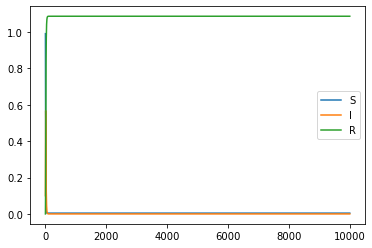

In [7]:
#print((solve_dict))
plt.plot(solve_dict_classic.t, solve_dict_classic.y[0,:], label="S")
plt.plot(solve_dict_classic.t, solve_dict_classic.y[1,:], label="I")
plt.plot(solve_dict_classic.t, solve_dict_classic.y[2,:], label="R")
plt.legend()
plt.show()

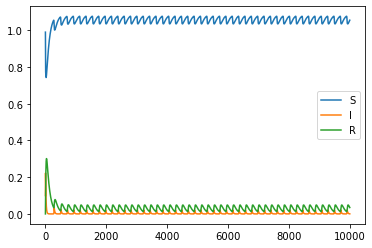

In [8]:
plt.plot(solve_dict_memory.t, solve_dict_memory.y[0,:], label="S")
plt.plot(solve_dict_memory.t, solve_dict_memory.y[1,:], label="I")
plt.plot(solve_dict_memory.t, solve_dict_memory.y[2,:], label="R")
plt.legend()
plt.show()


In [9]:
solve_dict_seasonal = solve_ivp(model.SeasonalyIncrement,[0,t_max], [0.99,0.01,0.0, 0, 0],max_step=1 )

In [10]:
I = solve_dict_seasonal.y[1,:]
t = solve_dict_seasonal.t
peaks = find_peaks(I)

In [11]:
print(peaks)

(array([   4,  305,  579,  760,  986, 1216, 1388, 1645, 1816, 2055, 2273,
       2455, 2708, 2873, 3123, 3326, 3523, 3769, 3932, 4189, 4377, 4592,
       4828, 4995, 5254, 5429, 5661, 5886, 6062, 6317, 6485, 6730, 6941,
       7129, 7379, 7543, 7797, 7993, 8198, 8439, 8604, 8862, 9044, 9267,
       9498, 9669, 9926]), {})


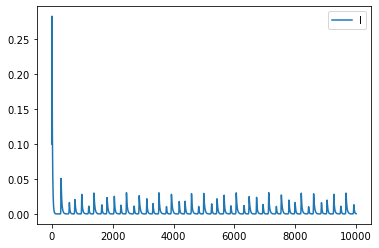

In [12]:
#plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[0,:], label="S")
plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[1,:], label="I")
#plt.plot(solve_dict_seasonal.t, solve_dict_seasonal.y[2,:], label="R")
plt.legend()
plt.show()

In [48]:
peaks_list = []
precision = 1000
t_max = 3000
for s in np.linspace(0,1,precision):
    model.s = s
    S = np.random.random()
    solve_dict_seasonal = solve_ivp(model.SeasonalyIncrement,[0,t_max], [S,1-S,0.0, 0, 0],max_step=1 )
    I = solve_dict_seasonal.y[1,:]
    t = solve_dict_seasonal.t
    peaks = find_peaks(I)
    peaks_list.append(I[peaks[0]])
    # print("Done ", s, " steps")

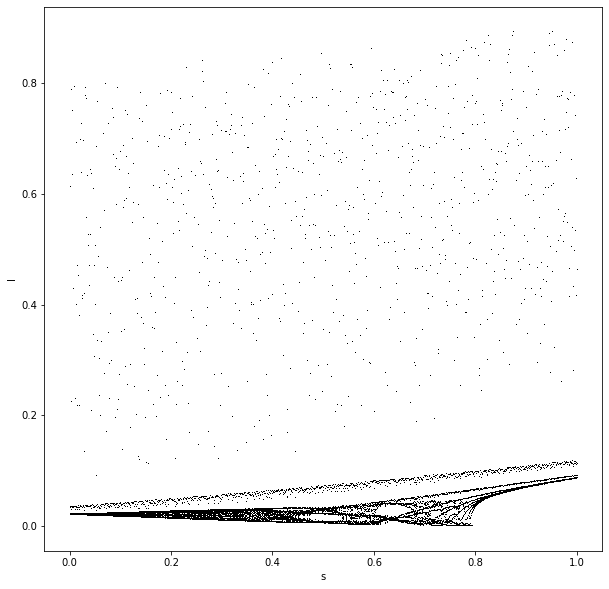

In [50]:
s_list = np.linspace(0,1,precision)
plt.figure(figsize=(10,10))

for peaks,s  in zip(peaks_list,s_list):
    one_s_list = [s for _ in range(len(peaks))]
    plt.scatter(one_s_list,peaks,color='black',marker=',',lw=0, s=1)

plt.ylabel('I')
plt.xlabel('s')
plt.show()

